In [2]:
import numpy as np 
import matplotlib.pyplot as plt 

from prml.utils.encoder import OnehotToLabel
from prml.sequential_data import (
    AR,
    GaussHMM,
    BernoulliHMM,
    LinearDynamicalSystem
)

# Auto Regressive Model

In [3]:
def make_sequential_data(n=100,increase=True):
    t = np.linspace(0,20,n)
    if increase:
        trend = 0.8*t + np.random.randn(n)*0.2
    else:
        trend = np.random.randn(n)*0.2
    seasonal = np.sin(t*4000)*2
    return trend + seasonal

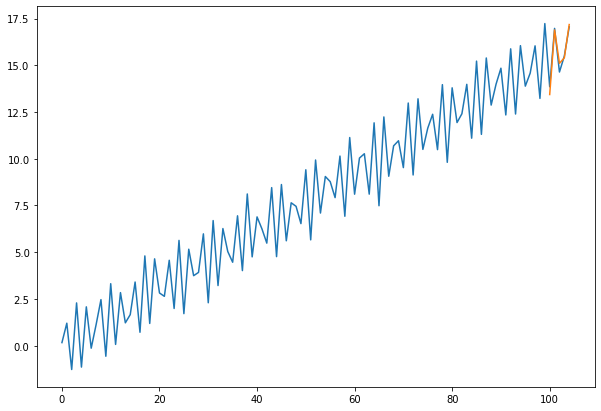

In [4]:
ar = AR(p = 5)
X = make_sequential_data(n=105)
X_tr,X_val = X[:100],X[100:]
ar.fit(X_tr)
X_pred = ar.predict(X_tr,size=5) 

fig,ax = plt.subplots(1,1,figsize=(10,7))
ax.plot(np.arange(105),X,label = "data")
ax.plot(np.arange(100,105),X_pred,label = "predicted data")
plt.show()

# Gauss Hidden Markov Model

HMM can only predict stationary process

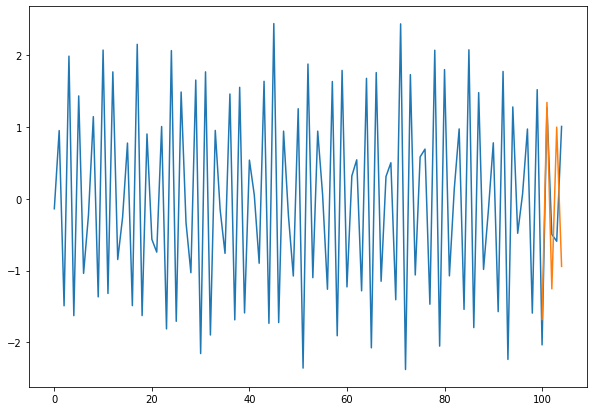

In [5]:
ghmm = GaussHMM(K=5)
X = make_sequential_data(n=105,increase=False)
X_tr,X_val = X[:100],X[100:]
ghmm.fit(X_tr.reshape(-1,1))
X_pred = ghmm.predict(X_tr.reshape(-1,1),size=5) 

fig,ax = plt.subplots(1,1,figsize=(10,7))
ax.plot(np.arange(105),X,label = "data")
ax.plot(np.arange(100,105),X_pred,label = "predicted data")
plt.show()

# Bernoulli Hidden Markov Model 

In [6]:
def make_markov_data(n=100):
    data = np.zeros((n,6)) 
    A = np.random.rand(6,6) + 10*np.eye(6) 
    A /= A.sum(axis = 0)

    state = np.random.multinomial(1,np.array([1/6]*6))
    data[0] = state 
    for i in range(n-1): 
        next = np.dot(A,state)
        state = np.random.multinomial(1,next) 
        data[i+1] = state
    
    return data

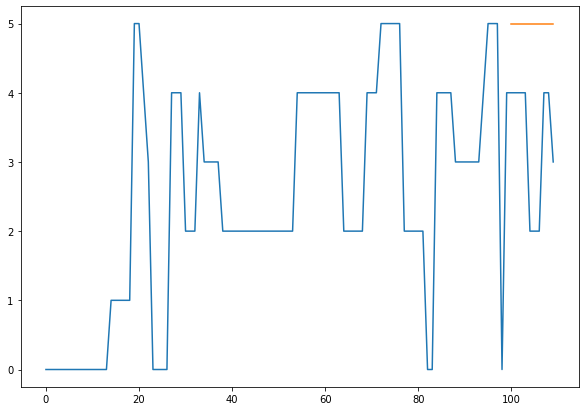

In [7]:
bhmm = BernoulliHMM(K=5)
X = make_markov_data(n=110)
X_tr,X_val = X[:100],X[100:]
bhmm.fit(X_tr) 
X_pred = bhmm.predict(X_tr,size=10).argmax(axis = 1)

ohe = OnehotToLabel()
X = ohe.fit_transform(X)

fig,ax = plt.subplots(1,1,figsize=(10,7))
ax.plot(np.arange(110),X,label = "data")
ax.plot(np.arange(100,110),X_pred,label = "predicted data")
plt.show()

# Linear Dynamical System

In [9]:
def make_tracking_data(n=50):
    X = np.zeros((n,2))
    rad = 0
    for i in range(n-1):
        X[i+1] = X[i] + np.array([np.cos(rad),np.sin(rad)])*4
        rad += 0.20
    return X,X+np.random.randn(n,2)

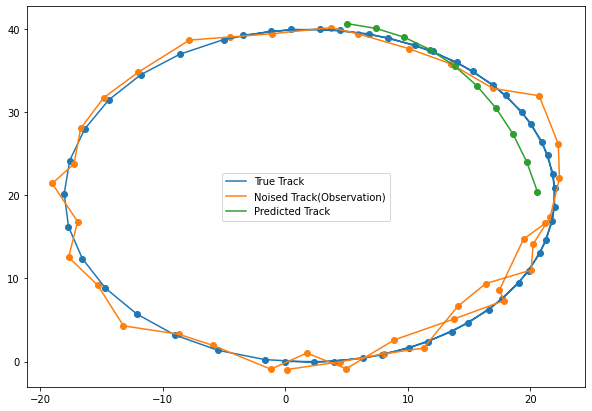

In [10]:
X_true,X_noised = make_tracking_data(n=50)
X_tr = X_noised[:40]

lds = LinearDynamicalSystem(K=4,max_iter=100)
lds.fit(X_tr) 
X_pred = lds.predict(X_tr,size=10)

fig,ax = plt.subplots(1,1,figsize=(10,7))
ax.scatter(X_true[:,0],X_true[:,1])
ax.plot(X_true[:,0],X_true[:,1],label = "True Track")
ax.scatter(X_tr[:,0],X_tr[:,1])
ax.plot(X_tr[:,0],X_tr[:,1],label = "Noised Track(Observation)")
ax.scatter(X_pred[:,0],X_pred[:,1])
ax.plot(X_pred[:,0],X_pred[:,1],label = "Predicted Track")
plt.legend()
plt.show()